# **Predictive Analysis** - Early Stage Diabetes Risk Prediction

<p align="right">by Annisa Mufidatun Sholihah</p>




## Problem Background


![Diabetes effect](https://assets.mrmed.in/others/file-1632987112542-597612264-Side%20effects%20of%20Diabetes.jpeg?w=1920&q=75)


Prediksi Risiko Diabetes pada tahap awal sangat penting karena memungkinkan intervensi dini yang dapat secara signifikan meningkatkan hasil kesehatan. Berikut adalah beberapa alasan mengapa ini penting:

1. **Pencegahan Perkembangan Penyakit**: Dengan mengidentifikasi individu yang berisiko mengembangkan diabetes sejak dini, langkah-langkah pencegahan dapat diterapkan untuk menunda atau mencegah timbulnya penyakit tersebut.

2. **Modifikasi Gaya Hidup**: Prediksi dini memungkinkan individu untuk melakukan perubahan gaya hidup yang diperlukan, seperti memperbaiki pola makan, meningkatkan aktivitas fisik, dan menjaga berat badan yang sehat, yang sangat penting untuk mengurangi risiko diabetes.

3. **Efisiensi Biaya**: Deteksi dan pencegahan dini umumnya lebih hemat biaya daripada mengobati diabetes dan komplikasinya. Ini dapat mengurangi beban finansial pada individu dan sistem kesehatan.

4. **Peningkatan Kualitas Hidup**: Intervensi dini dapat mencegah atau menunda komplikasi yang terkait dengan diabetes, seperti penyakit kardiovaskular, gagal ginjal, dan kerusakan saraf, sehingga meningkatkan kualitas hidup secara keseluruhan.

5. **Intervensi yang Tepat Sasaran**: Penyedia layanan kesehatan dapat menawarkan rencana perawatan yang dipersonalisasi dan memantau pasien dengan lebih efektif ketika mereka mengetahui faktor risiko sejak awal.

Dengan fokus pada prediksi risiko diabetes pada tahap awal, sistem kesehatan dapat beralih dari pendekatan reaktif ke proaktif yang pada akhirnya mengarah pada hasil kesehatan yang lebih baik dan penurunan morbiditas serta mortalitas terkait diabetes.


**Goals (Tujuan)**
Tujuan dari proyek ini adalah untuk mengembangkan model prediktif yang akurat untuk mengidentifikasi individu dengan risiko tinggi terkena diabetes pada tahap awal. Dengan memprediksi risiko ini, kita dapat:
1. Memberikan informasi yang dapat digunakan untuk intervensi kesehatan yang proaktif.
2. Meningkatkan kualitas hidup individu dengan mencegah perkembangan penyakit.
3. Mengurangi biaya perawatan kesehatan yang terkait dengan pengobatan diabetes dan komplikasinya.

**Solution Statement**

Untuk mencapai tujuan tersebut, kita mengajukan beberapa solusi yang dapat diukur dengan metrik evaluasi seperti akurasi, presisi, recall, dan F1-score.


*   Solution 1: Logistic Regression
*   Solution 2: Random Forest

Dengan menggunakan kedua solusi ini, kita dapat membandingkan kinerja model logistic regression dan random forest untuk menentukan pendekatan mana yang lebih efektif dalam memprediksi risiko diabetes pada tahap awal.

## **Import library dan dataset**

Dibagian ini library yang diperlukan diimport

In [1]:
# import library
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Dataset diambil langsung dari kaggle dengan import

In [2]:
#import kaggle dataset
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d abdelazizsami/early-stage-diabetes-risk-prediction
!unzip early-stage-diabetes-risk-prediction.zip


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/abdelazizsami/early-stage-diabetes-risk-prediction
License(s): Apache 2.0
  0% 0.00/2.52k [00:00<?, ?B/s]
100% 2.52k/2.52k [00:00<00:00, 4.02MB/s]
Archive:  early-stage-diabetes-risk-prediction.zip
  inflating: diabetes_data_upload.csv  


Link to dataset: [diabetes dataset](https://www.kaggle.com/datasets/abdelazizsami/early-stage-diabetes-risk-prediction)

Melihat isi dataset yang sudah diimport

In [3]:
df = pd.read_csv('/content/diabetes_data_upload.csv')
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


ada 520 baris data dan 17 feature/variabel pada dataset

## **Exploratory Data Analysis**

Pertama, cek features dalam dataset beserta tipe datanya

In [4]:
#list feature di dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

Kemudian untuk fitur numerik kita lihat statistic summarynya

In [5]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


Kita juga melihat apakah ada null value di dataset

In [6]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

dari hasil tidak ditemukan null value dari dataset

### **Univariate Analysis**

Untuk univariate analysys kita plot masing-masing feature di dataset. Pertama untuk data numerik digunakan histogram untuk melihat persebarannya

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

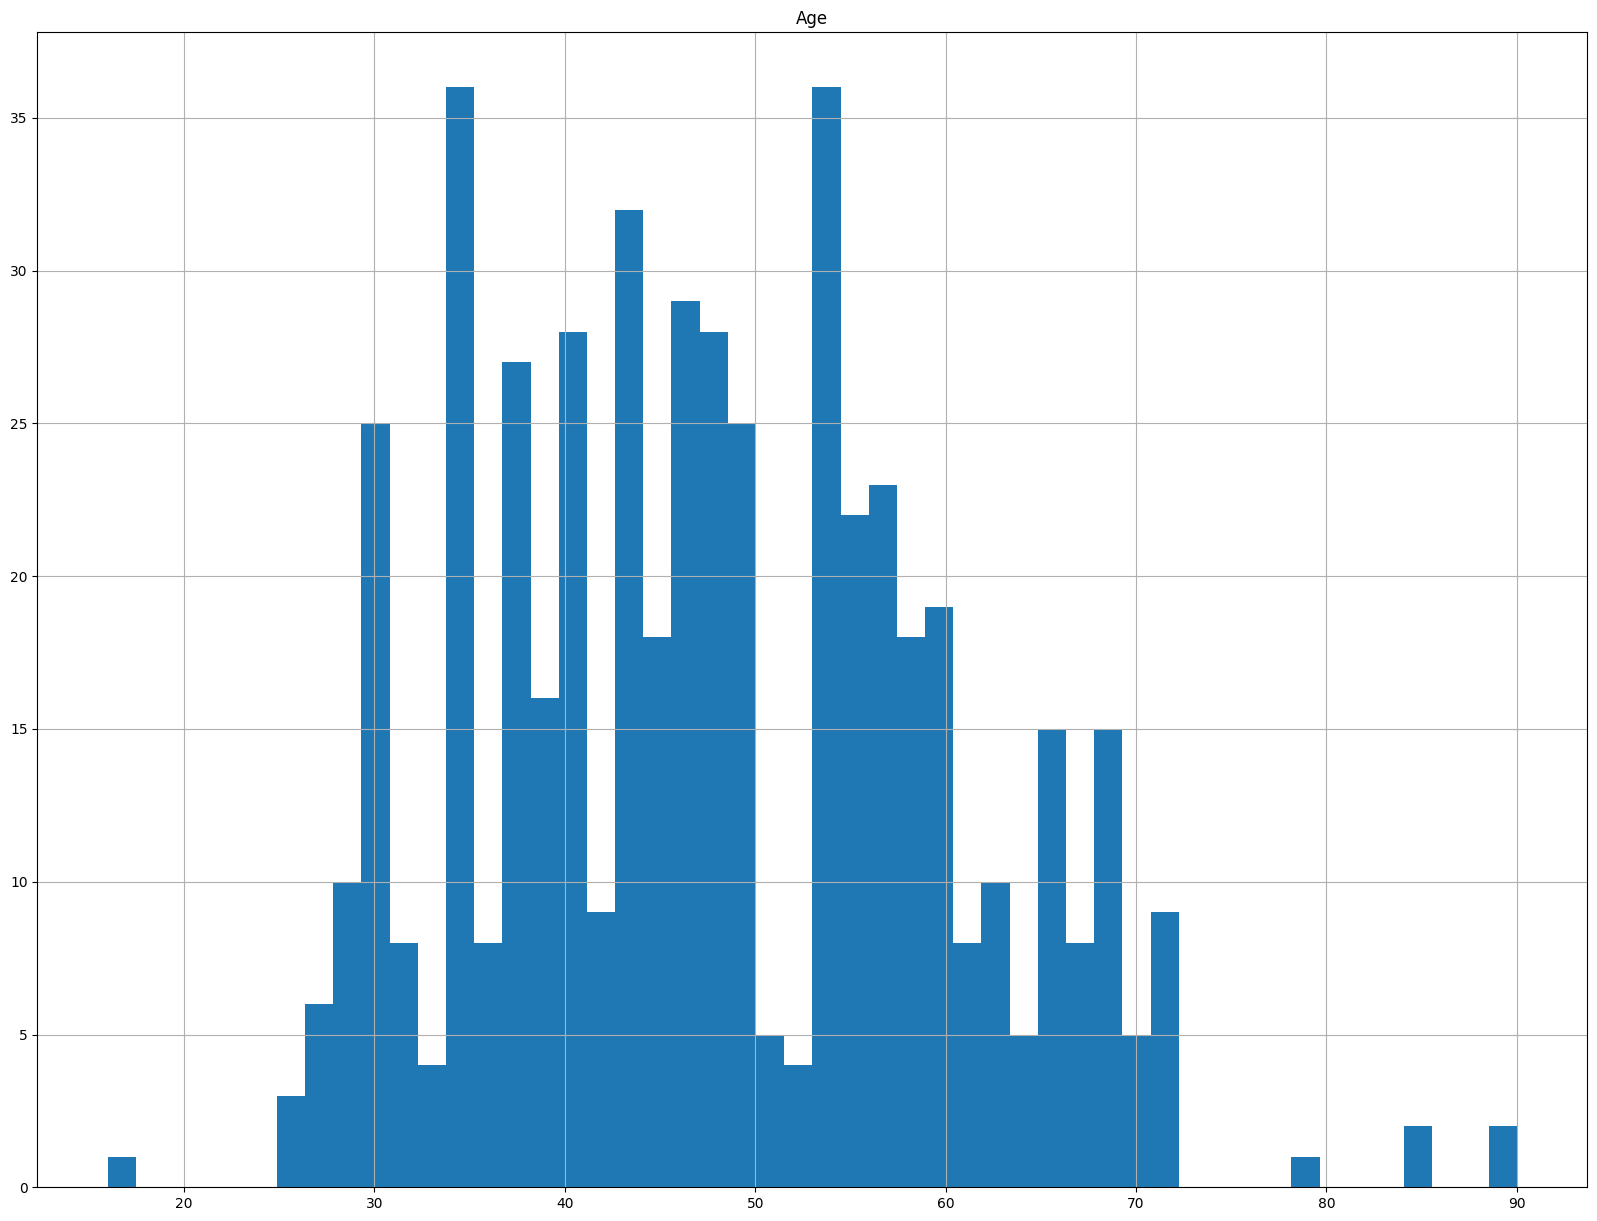

In [7]:
# fitur age
df.hist(bins=50, figsize=(20,15))

Sedangkan untuk fitur kategorikal digunakan barchart untuk melihat persebaran di setiap kategorinya.

Analisis univariate untuk fitur: Gender
        jumlah sampel  persentase
Gender                           
Male              328        63.1
Female            192        36.9


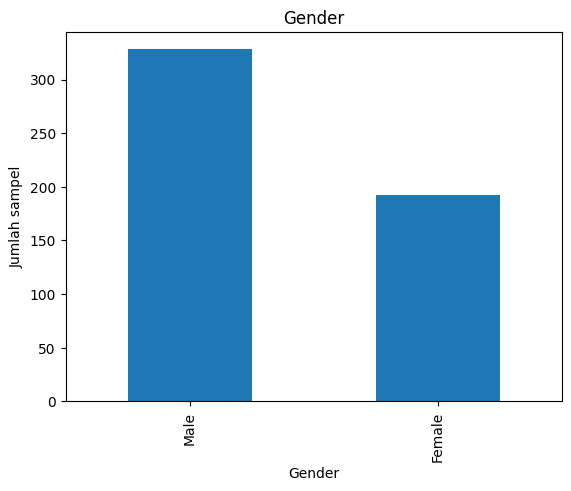

Analisis univariate untuk fitur: Polyuria
          jumlah sampel  persentase
Polyuria                           
No                  262        50.4
Yes                 258        49.6


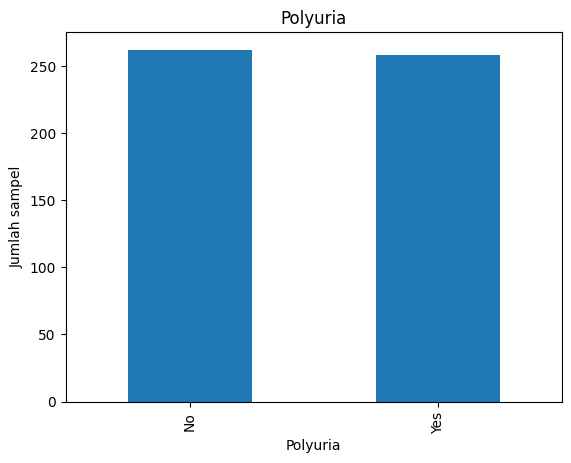

Analisis univariate untuk fitur: Polydipsia
            jumlah sampel  persentase
Polydipsia                           
No                    287        55.2
Yes                   233        44.8


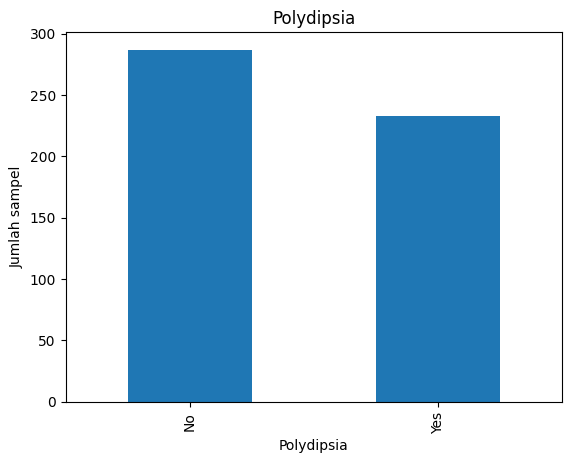

Analisis univariate untuk fitur: sudden weight loss
                    jumlah sampel  persentase
sudden weight loss                           
No                            303        58.3
Yes                           217        41.7


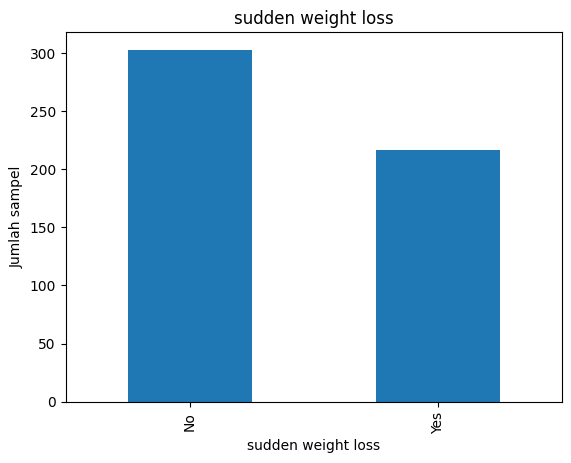

Analisis univariate untuk fitur: weakness
          jumlah sampel  persentase
weakness                           
Yes                 305        58.7
No                  215        41.3


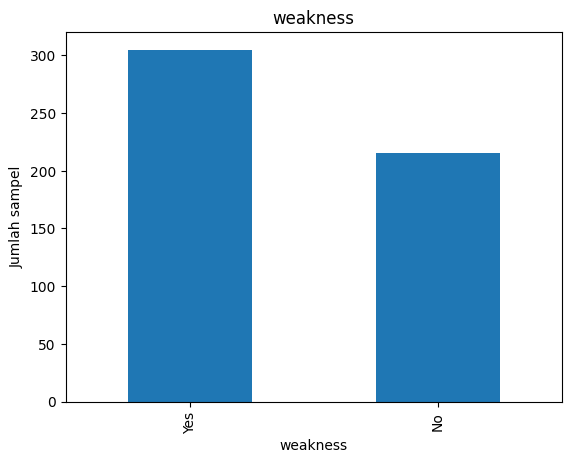

Analisis univariate untuk fitur: Polyphagia
            jumlah sampel  persentase
Polyphagia                           
No                    283        54.4
Yes                   237        45.6


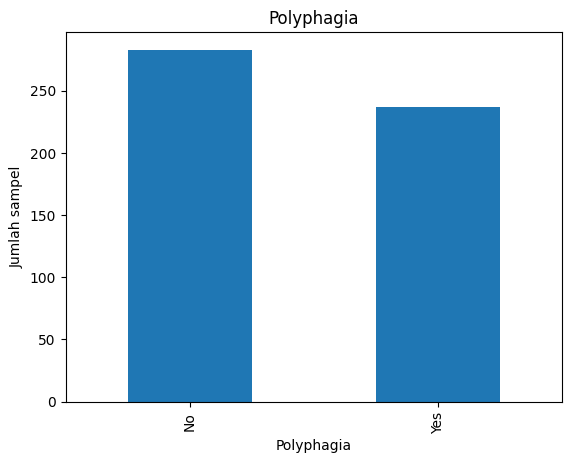

Analisis univariate untuk fitur: Genital thrush
                jumlah sampel  persentase
Genital thrush                           
No                        404        77.7
Yes                       116        22.3


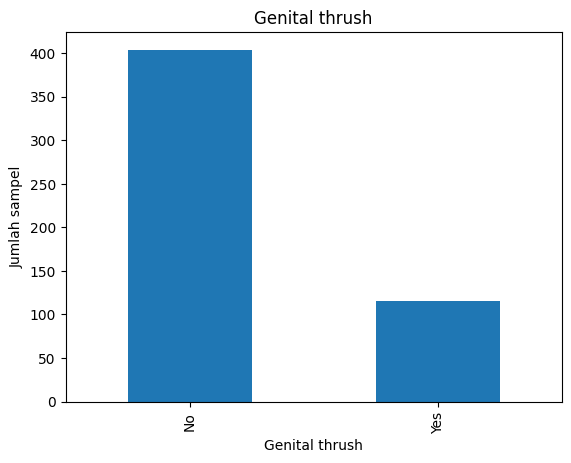

Analisis univariate untuk fitur: visual blurring
                 jumlah sampel  persentase
visual blurring                           
No                         287        55.2
Yes                        233        44.8


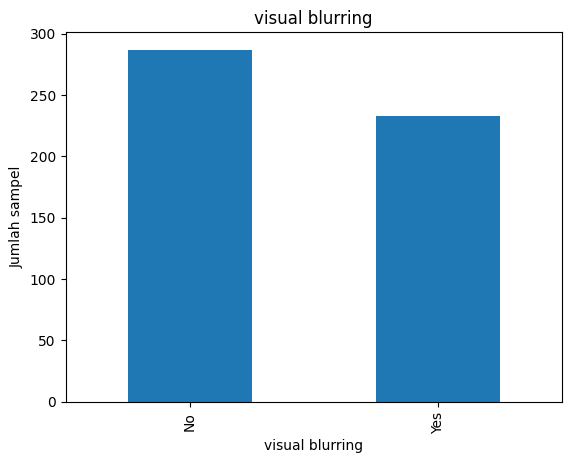

Analisis univariate untuk fitur: Itching
         jumlah sampel  persentase
Itching                           
No                 267        51.3
Yes                253        48.7


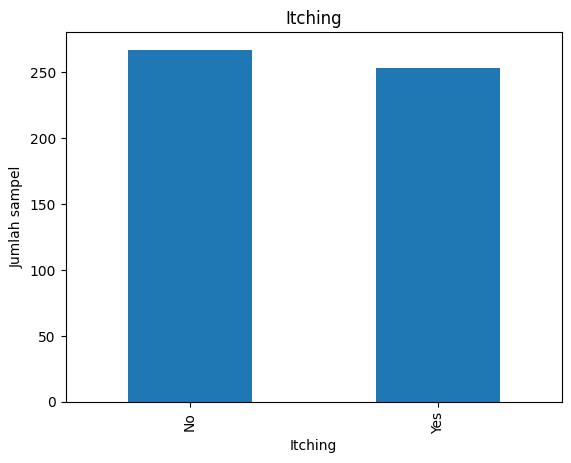

Analisis univariate untuk fitur: Irritability
              jumlah sampel  persentase
Irritability                           
No                      394        75.8
Yes                     126        24.2


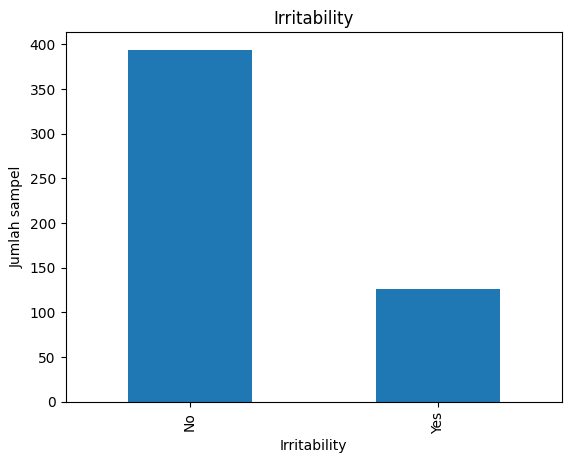

Analisis univariate untuk fitur: delayed healing
                 jumlah sampel  persentase
delayed healing                           
No                         281        54.0
Yes                        239        46.0


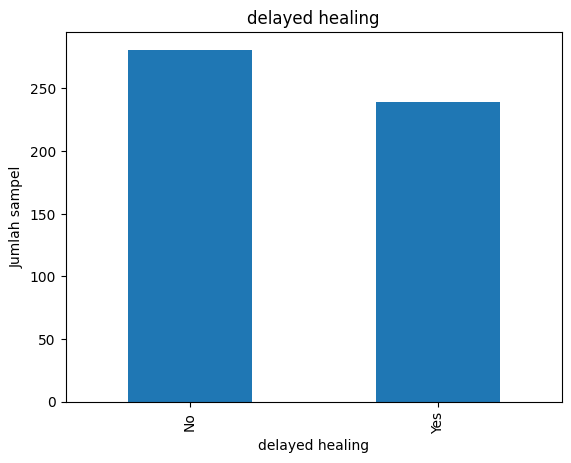

Analisis univariate untuk fitur: partial paresis
                 jumlah sampel  persentase
partial paresis                           
No                         296        56.9
Yes                        224        43.1


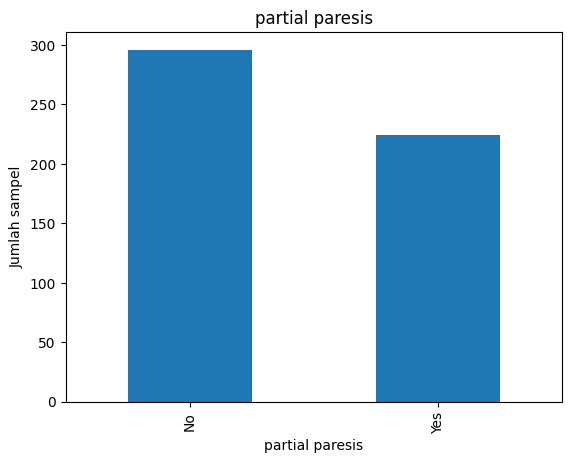

Analisis univariate untuk fitur: muscle stiffness
                  jumlah sampel  persentase
muscle stiffness                           
No                          325        62.5
Yes                         195        37.5


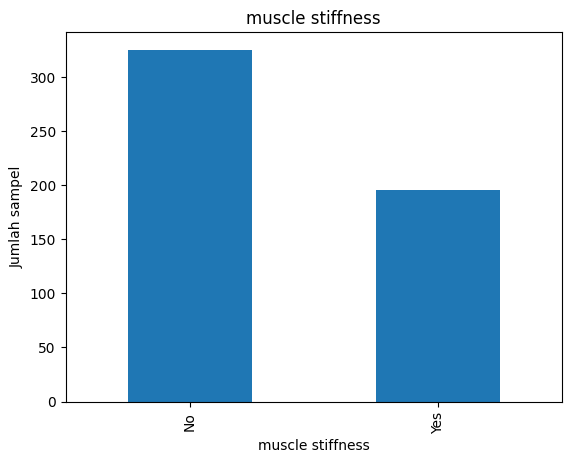

Analisis univariate untuk fitur: Alopecia
          jumlah sampel  persentase
Alopecia                           
No                  341        65.6
Yes                 179        34.4


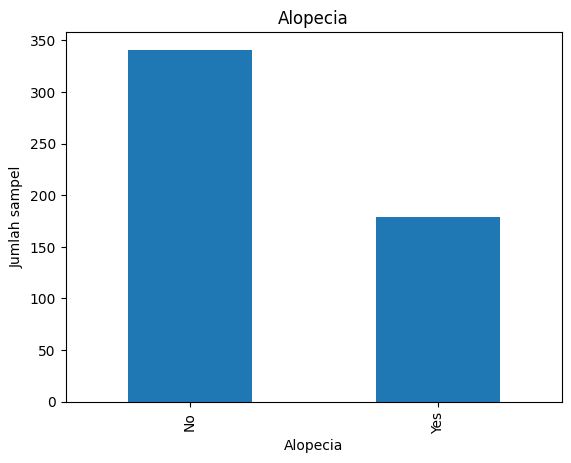

Analisis univariate untuk fitur: Obesity
         jumlah sampel  persentase
Obesity                           
No                 432        83.1
Yes                 88        16.9


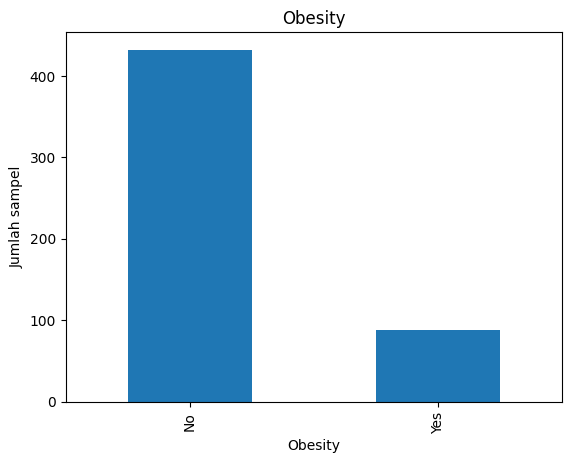

Analisis univariate untuk fitur: class
          jumlah sampel  persentase
class                              
Positive            320        61.5
Negative            200        38.5


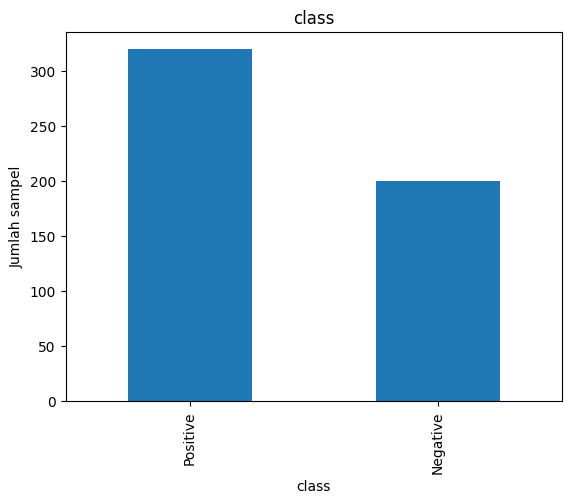

In [8]:
# categorical features
categorical_features = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia',
                        'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing',
                        'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']

# Loop melalui setiap fitur kategorikal
for feature in categorical_features:
    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)
    data = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})

    print(f"Analisis univariate untuk fitur: {feature}")
    print(data)

    count.plot(kind='bar', title=feature)
    plt.xlabel(feature)
    plt.ylabel('Jumlah sampel')
    plt.show()

## **Data Preparation**

### **Encoding**

Untuk encoding dilakukan dengan cara mapping integer ke kategori. Untuk fitur yang kategorinya yes or no menggunakan looping untuk mempermudah proses encoding. Sedangkan untuk gender dan class encoding di cell terpisah karena memiliki kategori yang berbeda.

In [9]:
# encoding fitur yang kategorinya yes and no
features_to_encode = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia',
                      'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing',
                      'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']

# Loop melalui setiap fitur dan lakukan encoding
for feature in features_to_encode:
    df[feature] = df[feature].map({'No': 0, 'Yes': 1})

# Menampilkan hasil encoding
print(df.head())

   Age Gender  Polyuria  Polydipsia  sudden weight loss  weakness  Polyphagia  \
0   40   Male         0           1                   0         1           0   
1   58   Male         0           0                   0         1           0   
2   41   Male         1           0                   0         1           1   
3   45   Male         0           0                   1         1           1   
4   60   Male         1           1                   1         1           1   

   Genital thrush  visual blurring  Itching  Irritability  delayed healing  \
0               0                0        1             0                1   
1               0                1        0             0                0   
2               0                0        1             0                1   
3               1                0        1             0                1   
4               0                1        1             1                1   

   partial paresis  muscle stiffness  Alopec

In [10]:
# encoding fitur gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [11]:
# encoding fitur class
df['class'] = df['class'].map({'Negative': 0, 'Positive': 1})

In [12]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


### **Hapus outlier**

Untuk menghapus outlier dibuat function untuk menghitung IQR. Dari hasil IQR didapatkan batas bawah dan atas. Dari situ baris yang umurnya di bawah batas bawah dan di atas batas atas akan dihapus

In [13]:
def outlier_treatment(datacolumn):
  sorted(datacolumn)  # Memastikan data sudah urut
  Q1, Q3 = np.percentile(datacolumn , [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range, upper_range

In [14]:
# Menghitung batas bawah dan atas untuk kolom Age
lowerbound, upperbound = outlier_treatment(df.Age)
print("Batas bawah: {0}\nBatas atas: {1}".format(lowerbound, upperbound))

Batas bawah: 12.0
Batas atas: 84.0


In [15]:
# Menampilkan data yang menjadi outlier
df[(df.Age < lowerbound) | (df.Age > upperbound)]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
101,85,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1
102,90,1,0,1,1,0,0,1,1,1,0,0,0,1,1,0,1
185,85,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1
186,90,1,0,1,1,0,0,1,1,1,0,0,0,1,1,0,1


In [16]:
# Menghapus outlier
data = df.drop(df[(df.Age < lowerbound) | (df.Age > upperbound)].index)
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


### **Standar Scaler**

Untuk fitur age, value diskala menjadi mean = 0 dan standar deviasi 1 dengan standard scaler.

In [17]:
scaler = StandardScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,-0.661508,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.880295,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,-0.575852,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,-0.233229,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,1.051607,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,-0.747164,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,0.023738,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,0.880295,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,-1.346754,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


### **Train-Test Split**

split data menjadi 80% data training dan 20% data test

In [18]:
X = data.drop(["class"],axis =1)
y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [19]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 516
Total # of sample in train dataset: 412
Total # of sample in test dataset: 104


### **Model Building**

Agar evaluasi lebih mudah dibuat function untuk looping ke model yang sudah dibuat dan mengevaluasinya dengan data test yang displit sebelumnya. Untuk evaluasi digunakan metriks akurasi, presisi, recall, dan F1-score

In [20]:
# function untuk evaluasi model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

### **Logistic Regression**

Model dengan metode logistic regeression menggunakan function dari library sklearn dan untuk evaluasi model menggunakan function yang dibuat sebelumnya

In [21]:
logistic_regression_model = LogisticRegression(random_state=55)
logistic_metrics = evaluate_model(logistic_regression_model,
                                  X_train, X_test, y_train, y_test)

### **Random Forest**

Model dengan metode random forest menggunakan function dari library sklearn dan untuk evaluasi model menggunakan function yang dibuat sebelumnya

In [22]:
random_forest_model = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
random_forest_metrics = evaluate_model(random_forest_model,
                                       X_train, X_test, y_train, y_test)


### **evaluasi model**

Hasil dari function evaluasi model ditampilkan dalam bentuk dataframe agar mudah dibaca.

In [23]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [logistic_metrics[0], random_forest_metrics[0]],
    'Precision': [logistic_metrics[1], random_forest_metrics[1]],
    'Recall': [logistic_metrics[2], random_forest_metrics[2]],
    'F1 Score': [logistic_metrics[3], random_forest_metrics[3]]
})

print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.913462   0.964912  0.887097   0.92437
1        Random Forest  0.990385   1.000000  0.983871   0.99187


Dari hasil di atas didapatkan bahwa model dengan metode **random forest** mendapatkan hasil lebih baik yaitu dengan akurasi 99%.

**prediksi dengan model**



Untuk memastikan akurasi dilakukan percobaan dengan menggunakan data test yang sudah ada lalu di test menggunakan model dan melihat akurasinya.

In [24]:
# Membuat dictionary untuk menyimpan model
model_dict = {
    'logistic_regression': logistic_regression_model,
    'random_forest': random_forest_model
}

In [25]:
# Memilih satu sampel dari X_test untuk prediksi
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true': y_test.iloc[:1].values[0]}

# Melakukan prediksi dengan setiap model dan menyimpan hasilnya
for name, model in model_dict.items():
    pred_dict['prediksi_' + name] = model.predict(prediksi).round(1)[0]

In [26]:
# Menampilkan hasil prediksi dalam bentuk DataFrame
prediksi_df = pd.DataFrame([pred_dict])
print(prediksi_df)

   y_true  prediksi_logistic_regression  prediksi_random_forest
0       1                             1                       1
